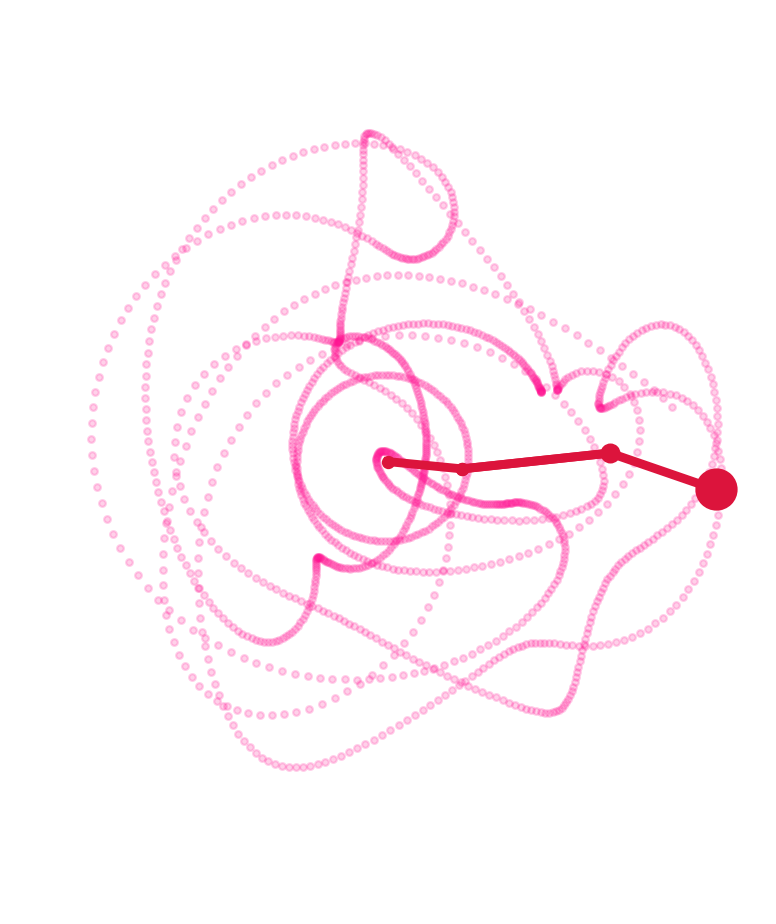

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros del péndulo triple
m1 = 1.0
m2 = 2.0
m3 = 1.5
L1 = 1.0
L2 = 2.0
L3 = 1.5
g = 9.8

# Condiciones iniciales
theta1 = np.pi / 2
theta2 = np.pi
theta3 = np.pi / 4
omega1 = 0
omega2 = 0
omega3 = 0
y0 = np.array([theta1, omega1, theta2, omega2, theta3, omega3])

# Tiempo de la simulación y paso de tiempo
t = np.linspace(0, 30, 1500)
dt = t[1] - t[0]

# Función para la derivada del sistema
def dy_dt(y, t, m1, m2, m3, L1, L2, L3, g):
    theta1, omega1, theta2, omega2, theta3, omega3 = y
    dtheta1_dt = omega1
    domega1_dt = (m2 * g * np.sin(theta2 - theta1) + m3 * g * np.sin(theta3 - theta1) -
                  m2 * L1 * omega1 ** 2 * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) -
                  m3 * L1 * omega1 ** 2 * np.sin(theta3 - theta1) * np.cos(theta3 - theta1)) / \
                 (L1 * (m1 + m2 * np.sin(theta2 - theta1) ** 2 + m3 * np.sin(theta3 - theta1) ** 2))
    dtheta2_dt = omega2
    domega2_dt = (-m2 * L2 * omega2 ** 2 * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) +
                  m2 * g * np.sin(theta2 - theta1) * np.cos(theta2 - theta1) +
                  m3 * g * np.sin(theta3 - theta2) * np.cos(theta3 - theta2)) / \
                 (L2 * (m1 + m2 * np.sin(theta2 - theta1) ** 2 + m3 * np.sin(theta3 - theta2) ** 2))
    dtheta3_dt = omega3
    domega3_dt = (-m3 * L3 * omega3 ** 2 * np.sin(theta3 - theta1) * np.cos(theta3 - theta1) +
                  m3 * g * np.sin(theta3 - theta1) * np.cos(theta3 - theta1) +
                  m2 * g * np.sin(theta3 - theta2) * np.cos(theta3 - theta2)) / \
                 (L3 * (m1 + m2 * np.sin(theta3 - theta1) ** 2 + m3 * np.sin(theta3 - theta2) ** 2))
    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt, dtheta3_dt, domega3_dt])

# Solución del sistema de ecuaciones diferenciales
y = np.zeros((len(t), 6))
y[0] = y0
for i in range(len(t) - 1):
    y[i + 1] = y[i] + dy_dt(y[i], t[i], m1, m2, m3, L1, L2, L3, g) * dt

# Posiciones de los extremos de los péndulos
x1 = L1 * np.sin(y[:, 0])
y1 = -L1 * np.cos(y[:, 0])
x2 = x1 + L2 * np.sin(y[:, 2])
y2 = y1 - L2 * np.cos(y[:, 2])
x3 = x2 + L3 * np.sin(y[:, 4])
y3 = y2 - L3 * np.cos(y[:, 4])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 8), dpi=160)
ax.set_axis_off()
plt.style.use('dark_background')

# Configurar los ejes
ax.set_xlim(-5, 5)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.grid()

# Crear las líneas que representan los péndulos
line1, = ax.plot([], [], lw=4, color='crimson', marker='o', markersize=5)
line2, = ax.plot([], [], lw=4, color='crimson', marker='o', markersize=5)
line3, = ax.plot([], [], lw=4, color='crimson', marker='o', markersize=5)
points, = ax.plot([], [], 'o', markersize=3, color='deeppink', alpha=0.2, zorder=1)
point2, = ax.plot([], [], 'o', markersize=18, color='crimson')
point3, = ax.plot([], [], 'o', markersize=12, color='crimson')

# Función para la actualización de las posiciones
def update_position(i, line1, line2, line3, point2, point3, points):
    # Actualización de las líneas
    line1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    line3.set_data([x2[i], x3[i]], [y2[i], y3[i]])

    # Actualización de la posición de la bola en el extremo inferior del segundo péndulo
    point2.set_data([x2[i]], [y2[i]])

    # Actualización de la posición de la bola en el extremo inferior del tercer péndulo
    point3.set_data([x3[i]], [y3[i]])

    # Modificar el tamaño de las bolas
    point2.set_markersize(8)  # Tamaño más grande para la bola inferior
    point3.set_markersize(18)  # Tamaño más pequeño para las otras bolas

    # Actualización de los puntos
    if i % 10 == 0:
        points.set_data(x3[:i], y3[:i])

    return line1, line2, line3, point2, point3, points

# Creación de la animación
animation = FuncAnimation(fig, update_position, fargs=(line1, line2, line3, point2, point3, points), frames=len(t),
                          interval=60, blit=True)

# Guardar la animación como gif
animation.save('pendulo_triple.gif', writer='pillow')
